In [135]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [136]:
yolo = cv2.dnn.readNet('./yolov3.weights', './yolov3.cfg')

In [137]:
# Classes for our images
classes = []
with open('./coco.names','r') as namefile:
  classes = namefile.read().splitlines()

len(classes)

80

In [138]:
image_path = input("Path of IMAGE you want to detect object?(./filename.jpg)")

Path of IMAGE you want to detect object?(./filename.jpg)./sample.jpg


In [140]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# to make model image properly
blob = cv2.dnn.blobFromImage(img, 1/255, (416,416), (0,0,0), swapRB=True, crop=False)
blob.shape

(1, 3, 416, 416)

In [141]:
yolo.setInput(blob)

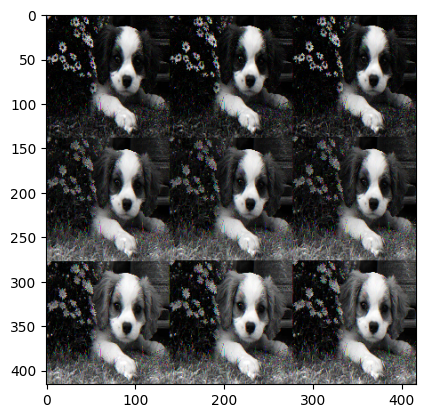

In [142]:
# To display image
i = blob[0].reshape(416, 416, 3)
plt.imshow(i)
# image will be shown in three channels rgb.

In [143]:
output_layer_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layer_name)

In [144]:
# For putting bounding box on image
boxes = []
# value predicted
confidences = []
class_ids = []

# Get the width and height from the blob shape
height, width, _ = img.shape

for output in layeroutput:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.7:
      center_x = int(detection[0]*width)
      center_y = int(detection[1]*height)
      w = int(detection[2]*width)
      h = int(detection[3]*height)

      x = int(center_x - w/2)
      y = int(center_y - h/2)

      boxes.append([x,y,w,h])
      confidences.append((float(confidence)))
      class_ids.append(class_id)

len(boxes)

3

In [145]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [146]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(boxes), 3))

In [147]:
if len(indexes) > 0:  # Check if any boxes were found
    indexes = np.array(indexes)  # Convert to NumPy array for flattening
    for i in indexes.flatten():
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = str(round(confidences[i], 2))
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label + " " + confidence, (x, y + 20), font, 2, (255, 255, 255), 2)

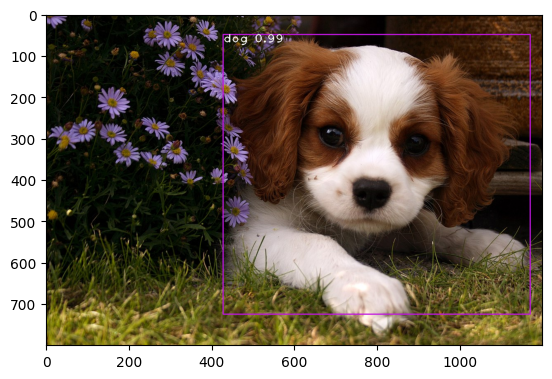

In [148]:
plt.imshow(img)